## Rhodonea Curves

A <a href="https://en.wikipedia.org/wiki/Rose_(mathematics)" target="_blank">rhodonea curve</a> (also known as "rose") is a simple sinusoid plotted in polar co-ordinates.

The curve is expressed as $r = cos(c\phi)$, where,<br>
* $r$ is the distance from the origin,
* $\phi$ is the angle such that $0\leq c\phi \leq 2\pi$, and,
* $c$ is a number of our choosing.

A few fun facts that we can verify with our experiments below:
1. When $c$ is an integer, the curve is rose shaped. It has $2c$ petals when $c$ is even, and $c$ petals when it is odd.
2. When $c$ is a half integer, the curve is rose shaped with $4c$ petals.
3. When $c$ is rational, the curve is closed and of finite length, but when irrational, it is not closed and of infinite length.

#### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

#### Function to compute the curve and return the corresponding cartesian co-ordinates

In our experiments, we define $c$ as $\frac{\textrm{num}}{\textrm{den}}$, or alternatively, one could pass in the value of the argument $c$. The former, however, gives much better results since we don't have to deal with round-offs and precision issues.

In [3]:
def rhodonea(num=1,den=1,c=None,n_pts=5000):
    if c!=None:
        f1,f2 = c.as_integer_ratio()
        fact = np.lcm(f1,f2)
    else:
        fact = np.lcm(num,den)
        c = num/den
    x = np.linspace(0,fact*2*np.pi,n_pts)
    r = np.cos(c*x)
    xx = r*np.cos(x)
    yy = r*np.sin(x)
    return xx, yy

#### Function to plot out the curve for a single value of $c$

In [4]:
def rhodonea_soloPlot(num=1,den=1):
    xx, yy = rhodonea(num,den)
    fig = plt.figure(1)
    ax = fig.add_subplot(111,facecolor='black')
    ax.scatter(xx,yy,c='peachpuff',marker='.',s=5)
    ax.set_aspect('equal', 'box')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('c = '+str(num/den))
    plt.show()

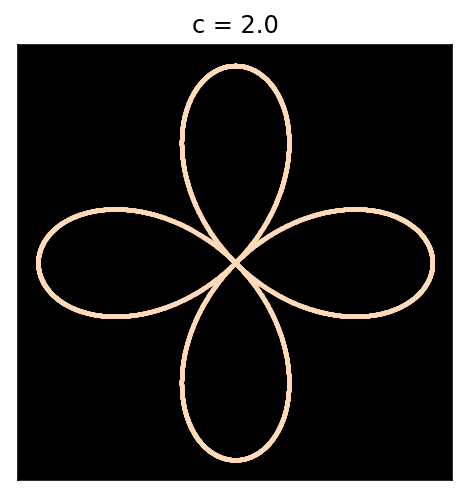

In [5]:
rhodonea_soloPlot(2)

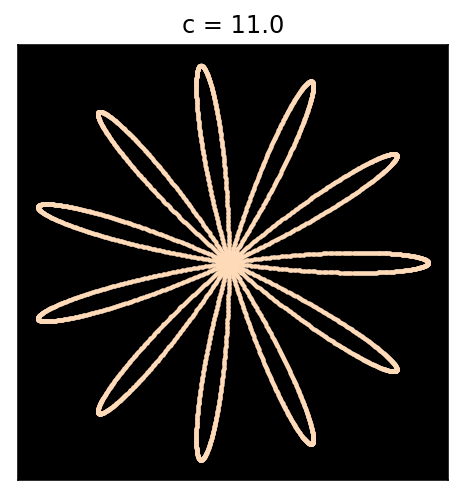

In [6]:
rhodonea_soloPlot(11)

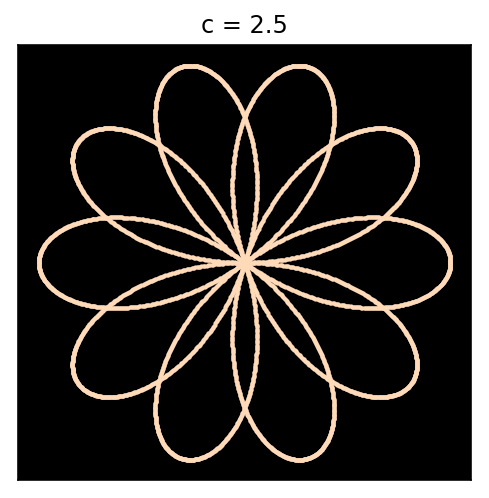

In [7]:
rhodonea_soloPlot(5,2)

#### Function to plot out a $k \times k$ grid of curves, where $c = \frac{j}{i}$ and $i, j = $ row, column indices respectively (1-indexing)

In [8]:
def rhodonea_multiPlot(k=5):
    cnt = 0
    fig = plt.figure(1,figsize=(2.5*k,2.5*k))
    for ii in range(1,k+1):
        for jj in range(1,k+1):
            cnt += 1
            xx, yy = rhodonea(jj,ii)
            ax = fig.add_subplot(k,k,cnt,facecolor='black')
            ax.scatter(xx,yy,c='peachpuff',marker='.',s=5)
            if ii==jj:
                ax.set_aspect('equal','box')
            else:
                ax.set(xlim=(-1.1, 1.1), ylim=(-1.1, 1.1))
            ax.set_xticks([])
            ax.set_yticks([])
    plt.show()
    return fig

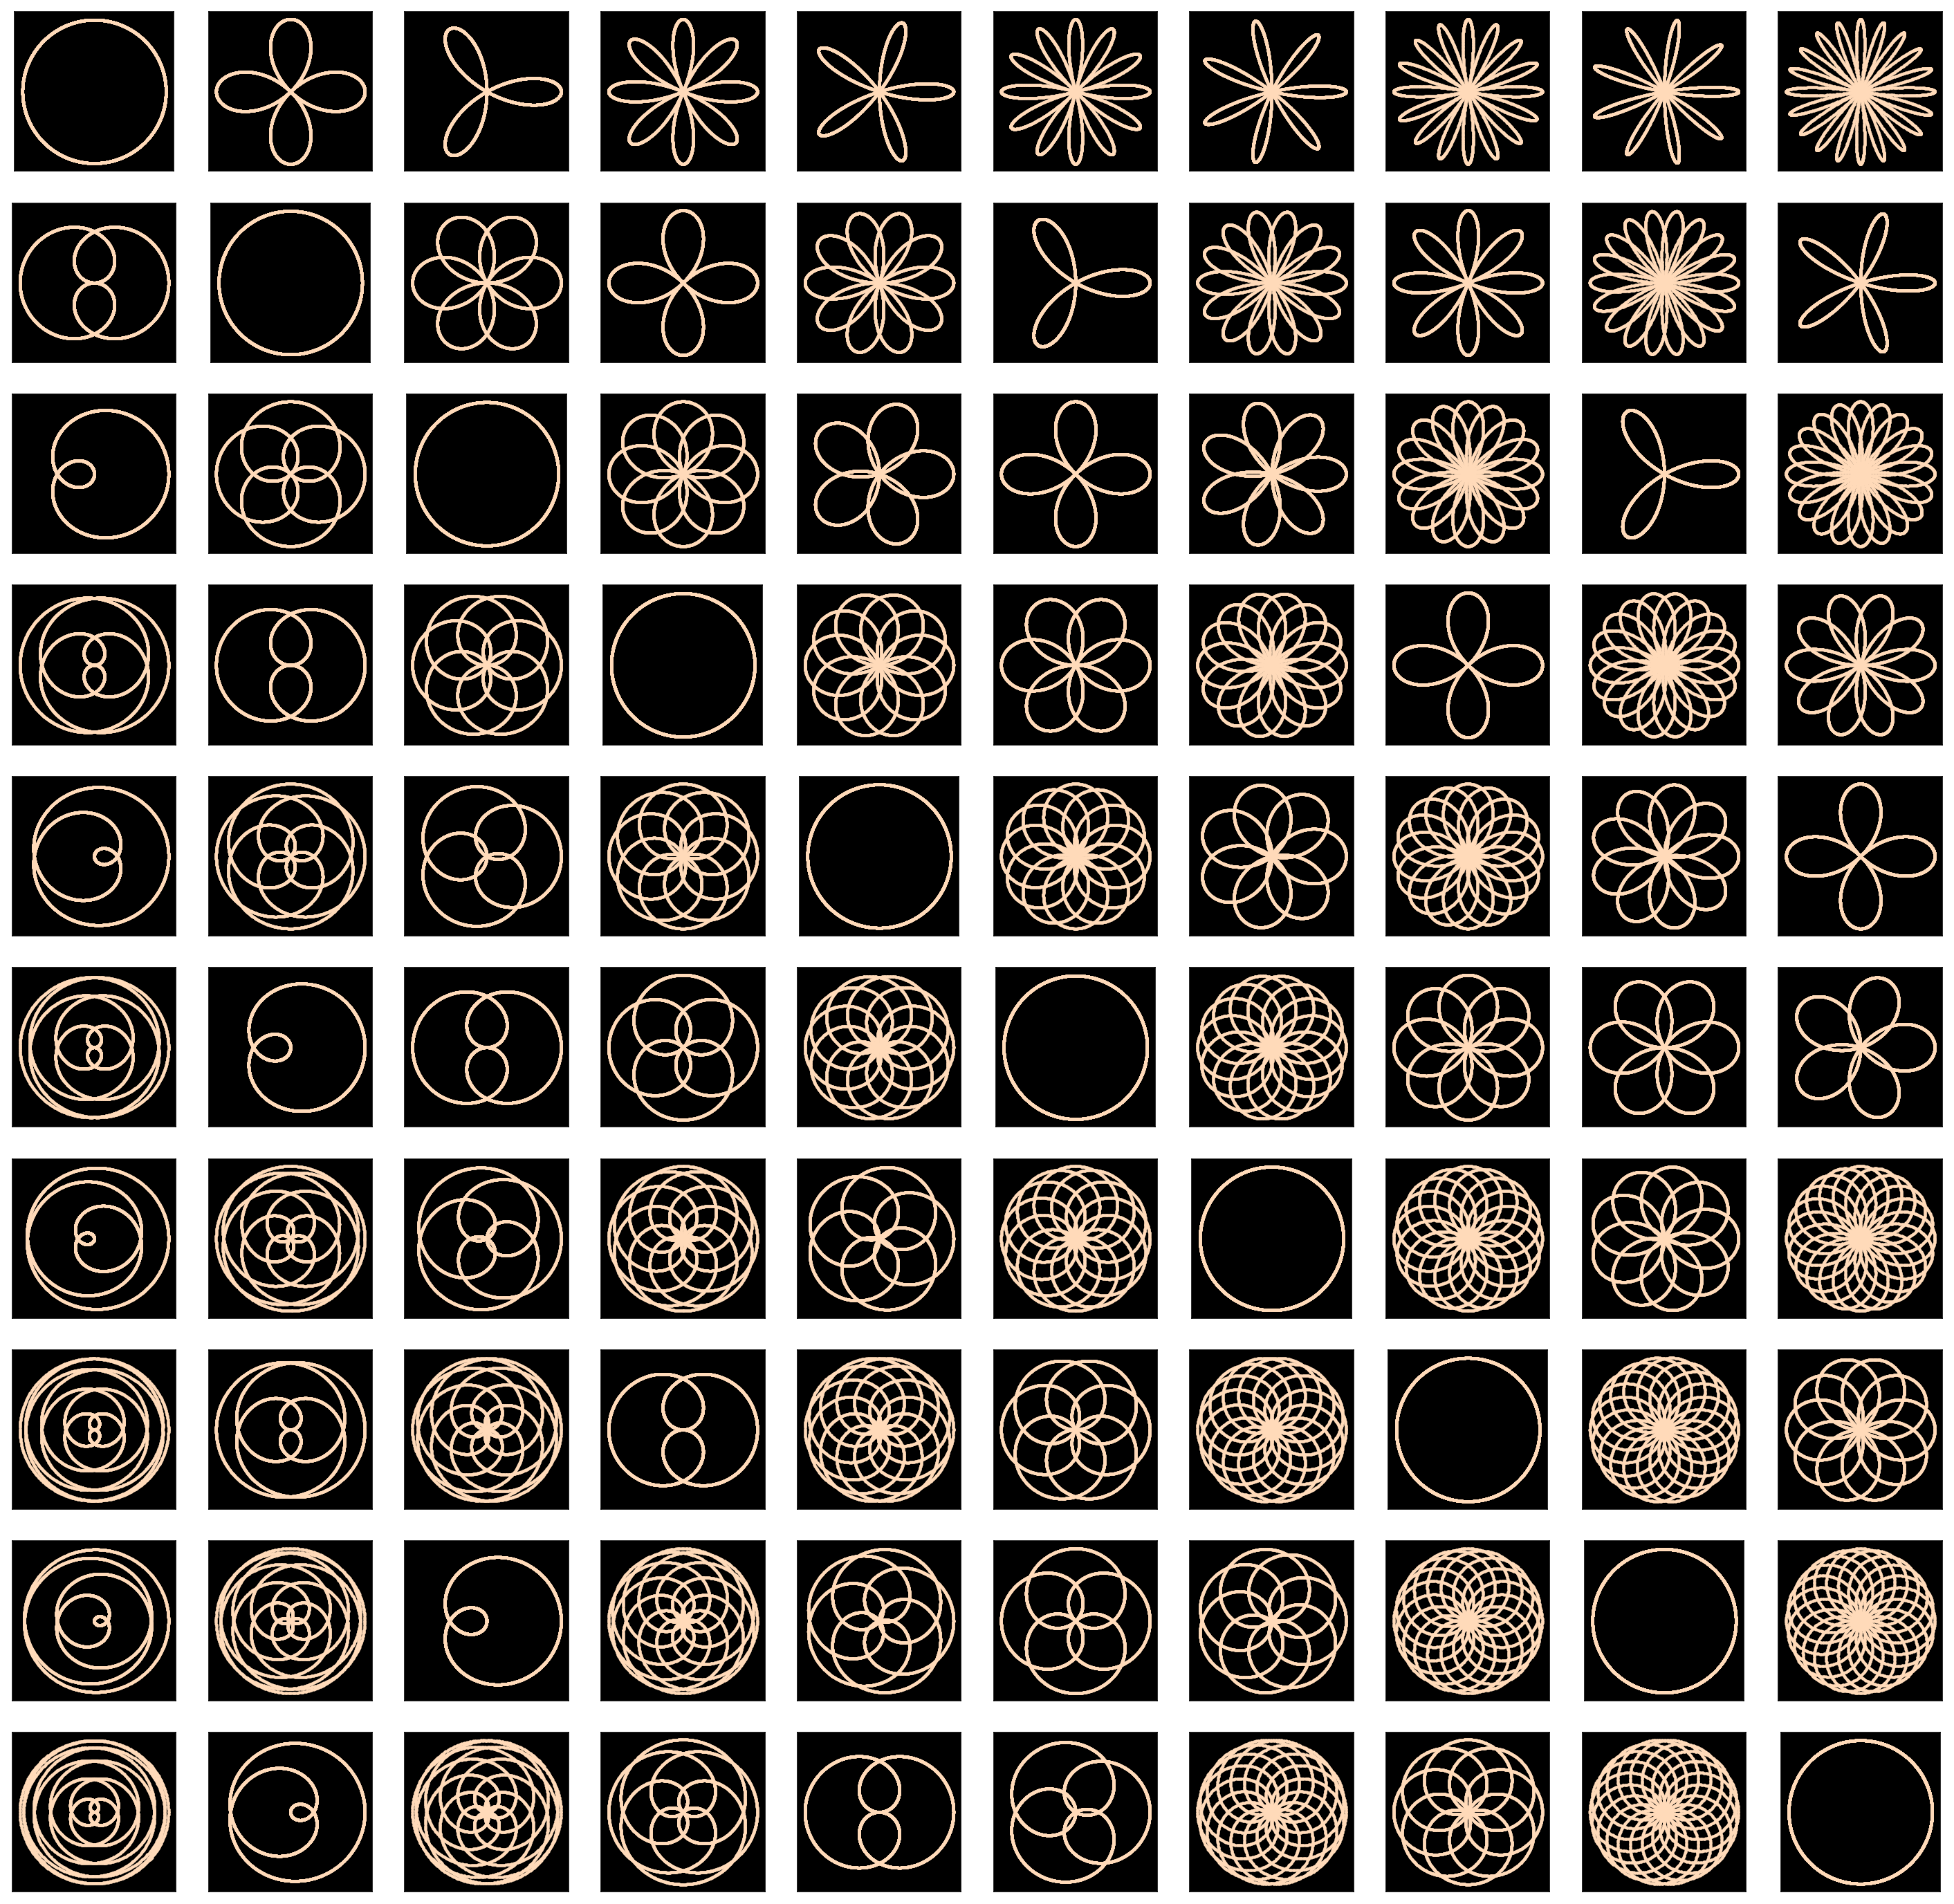

In [9]:
fig = rhodonea_multiPlot(10)